<a href="https://colab.research.google.com/github/kozyreviva/Data_Science/blob/main/%D0%A1%D0%B1%D0%BE%D1%80%D0%BD%D1%8B%D0%B9_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Привет ревьюер!!!) Сборный проект дался мне тяжело т.к я п пытался  написать его качественно и учитывая все те наставления которые мне давали предыдущие ревьюеры. От тебя я бы тоже жотел получить побольше коментариев и твоих советов. Спасибо!!! P.S. Я бы хотел потом пойти в Яндекс работать, так что можешь ориентироваться на их требования к проекту.
</div>

**ОПИСАНИЕ ПРОЕКТА**

Дана база данных и интернет-магазина который продаёт по всему миру
компьютерные игры. База собрана из открытых источников в которой содержатся  исторические данные о
продажах игр, оценки пользователей и экспертов, жанры и платформы
(например, Xboxили PlayStation). Нужно выявить определяющие успешность
игры закономерности. Это позволит сделать ставку на потенциально популярный
продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и нам нужно спланировать рекламную компанию на 2017-й. Нужно отработать принцип работы с данными.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating
Board) — это ассоциация, определяющая возрастной рейтинг компьютерных
игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную
категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для
подростков».

**План работы**

* Открытие файла с данными и изучение общую информации;
* Подготовка данных
    * Заменить названия столбцов;
    * Преобразование данные в нужные типы;
    * Обработать пропуски при необходимости;
    * Посчитать суммарные продажи во всех регионах и записать их в отдельный
столбец.
* Провести исследовательский анализ данных
    * Посмотреть сколько игр выпускалось в разные годы;
    * Посмотреть, как менялись продажи по платформам. Выберать платформы с
наибольшими суммарными продажами и построить распределение по годам;
    * Взять данные за соответствующий актуальный период. Актуальный
период определите самостоятельно в результате исследования предыдущих
вопросов. Основной фактор — эти данные помогут построить прогноз на 2017
год;
    * Не учитывать в работе данные за предыдущие годы;
    * Какие платформы лидируют по продажам, растут или падают? Выбрать
несколько потенциально прибыльных платформ;
    * Построить график «ящик с усами» по глобальным продажам игр в разбивке по
платформам;
    * Посмотреть, как влияют на продажи внутри одной популярной платформы
отзывы пользователей и критиков. Построить диаграмму рассеяния и
посчитать корреляцию между отзывами и продажами;
    * Соотнести выводы с продажами игр на других платформах.
    * Посмотреть на общее распределение игр по жанрам;
* Составить портрет пользователя каждого региона
    * Определите для пользователя каждого региона (NA, EU, JP):
        * Самые популярные платформы (топ-5);
        * Самые популярные жанры (топ-5);
        * Влияет ли рейтинг ESRB на продажи в отдельном регионе?
* Проверка гипотез:
    * Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    * Средние пользовательские рейтинги жанров Action и Sports разные.
* Общий вывод.

**РАБОТА НАД ПРОЕКТОМ**

**Открытие файла**

Подключим необходимые библиотеки.

In [156]:
import pandas as pd                                                             #подключение библиотек
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

Загрузим датафрейм и сохраним в переменную.

In [157]:
try:                                                                            #загрузка датафрейма
  df = pd.read_csv("/datasets/games.csv")
except:
  df = pd.read_csv("Games csv.csv")

Выведем на экран таблицу.

In [158]:
df.head(10)                                                                     #вывод на экнан таблицы

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Описание данных**

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating
Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает
им подходящую возрастную категорию.


Получим общую информацию о таблице.

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Первичные выводы**

В таблце есть ряд ощибок. Такие как неправильный формат записи названий столбцов, неправильный тип данных и наличие пропусков. 

Названия столбцов необходимо привести к змеиному геристру со всеми строчными буквами.

Типы данных для даты нужно изменить а в другис столбцах необходимо детальное рассмотрение и в случае если такая необходимость будет также изменить.

Пропуски в таблице будут рассматриваться детально и где необходимо заполняться подходящими значениями, оставляться без изменений или удаляться.


--------------------------------------------------------------------------------

**ПРЕДОБРАБОТКА ДАННЫХ**

Приступим к исправлению ошибок.

Изменим регистр в названиях столбцов.

In [160]:
df.columns = df.columns.str.lower()                                             #изменение регистра на нижний

Проверим изменения

In [161]:
df.columns                                                                      #вывод названий столбцов

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Приступим к изменению типов данных.

Сперва поменяем тип столбца 'year_of_release'. Можно заметить что столбец состоит из года выпуска и можно просто поменять тип на 'int', но в столбце присутствуют пропущенные значения. Поэтому пропуски в столбце и примим решение что с ними делать. Применим сортировку по продажам в Северной Америке.

In [162]:
df.query('year_of_release.isna()',engine = "python").sort_values(by = "na_sales",ascending = False)          #срез по пропускам и применение сортировки                

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
...,...,...,...,...,...,...,...,...,...,...,...
11000,Demon Chaos,PS2,NaN,Action,0.00,0.00,0.09,0.00,NaN,NaN,NaN
10837,Egg Monster Hero,DS,NaN,Role-Playing,0.00,0.00,0.09,0.00,NaN,NaN,E
15022,Umineko no Naku Koro ni San: Shinjitsu to Gens...,PS3,NaN,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
10764,Luminous Arc 2 (JP sales),DS,NaN,Role-Playing,0.00,0.00,0.10,0.00,NaN,NaN,NaN


Видим что игры которые указаны без года выпуска имеют очень малое количество продаж по всему миру, а в некоторых присутствуют пропуски по рейтингу.
Ввиду того что такие данные не информативны и по ним трудно делать какие-то выводы можно их удалить.

Удалим пропуски в столбце 'year_of_release' и изменим тип.

In [163]:
df = df.dropna(subset = ["year_of_release"]).copy()                                                                     #удаление пропусков
df.year_of_release = df.year_of_release.astype(int)                                                                     #изменение типа данных

Для столбцов с объёмом продаж по всем регионам тип данных 'float' допустим. Его изменять не будем.

Обработаем столбцы 'critic_score', 'user_score' и 'rating'.
Выведем на экран пропуски в столбце 'critic_score'.

In [164]:
df.query("critic_score.isna()",engine = "python")                                                                       #срез по пропускам

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Видим что в строках с пропусками в столбце 'critic_score' имеются пропуски в столбцах 'user_score' и 'rating', а также можно заметить что продажи по большенству игр не превышают миллиона копий.

Несмотря на то что строк с пропусками больше 8 тысяч такие данные не следует удалить, из-за того что они могут дать количественную информацию по некоторым вопросам. Но и заменять проауски медианным или средним значением не логично,потому отталкиваясь от других показателей пропуск будет не объективен.

Для заполнения пропуска поставим 'заглушку' и в случае ответа на вопросы которые будут затрагивать данные из этих столбцов, просто не будем принимать их в расчёт.

-1 будет означать 'заглушку' для 'user_score' и 'critic_score', а 'Unknown' для 'rating'.

 

In [165]:
df["critic_score"] = df["critic_score"].fillna(-1)                              #заполнение пропусков            
df["user_score"] = df["user_score"].fillna(-1)    
df["rating"] = df["rating"].fillna("Unknown")                                                                                               #заполнение пропусков

Проверим столбец 'user_score'.

Выведем уникальные значения на экран.

In [166]:
df.user_score.unique()                                                                                               #вывод уникальных значений

array(['8', -1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В этом столбце содержатся значения типа 'object', но данные вида 'float'.

В столбце имеются строки со значением 'tbd', что приводит к неправильному формату. Предположим что 'tbd' это аббревиатура 'too bad'.

Выведем все строки с 'tbd'.

In [167]:
df.query('user_score == "tbd"')                                                                                        #срез данных по значению 'tbd'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,-1.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,-1.0,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,-1.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,-1.0,tbd,E


Из данных видно что показатели по продажам крайне малы. Значение 'tbd' можно перевести в значение '0', а затем поменять данные на тип 'float'.


In [168]:
df.user_score = df.user_score.replace("tbd","0")                                                                     #изменения значения на 0
df.user_score = pd.to_numeric(df.user_score)                                                                         #изменение типа данных

Проверим изменения.

In [169]:
df.user_score.unique()                                                                                               #вывод уникальных значений

array([ 8. , -1. ,  8.3,  8.5,  6.6,  8.4,  8.6,  7.7,  6.3,  7.4,  8.2,
        9. ,  7.9,  8.1,  8.7,  7.1,  3.4,  5.3,  4.8,  3.2,  8.9,  6.4,
        7.8,  7.5,  2.6,  7.2,  9.2,  7. ,  7.3,  4.3,  7.6,  5.7,  5. ,
        9.1,  6.5,  0. ,  8.8,  6.9,  9.4,  6.8,  6.1,  6.7,  5.4,  4. ,
        4.9,  4.5,  9.3,  6.2,  4.2,  6. ,  3.7,  4.1,  5.8,  5.6,  5.5,
        4.4,  4.6,  5.9,  3.9,  3.1,  2.9,  5.2,  3.3,  4.7,  5.1,  3.5,
        2.5,  1.9,  3. ,  2.7,  2.2,  2. ,  9.5,  2.1,  3.6,  2.8,  1.8,
        3.8,  1.6,  9.6,  2.4,  1.7,  1.1,  0.3,  1.5,  0.7,  1.2,  2.3,
        0.5,  1.3,  0.2,  0.6,  1.4,  0.9,  1. ,  9.7])

Подсчитаем суммарные продажи во всех регионах и сохраним в отдельный столбец 'total_sales'.

In [170]:
df["global_sales"] = df.na_sales + df.eu_sales + df.jp_sales + df.other_sales                                        #добавление столбца

Выведем на экран таблицу.

In [171]:
df.head()                                                                                                            #вывод таблицы на экран

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,Unknown,31.38


**Вывод**

Обработанный датафрейм в первую очередь имел неправильный регистр в названиях столбцов.

Также присутствует наличие пропусков в столбцах рейтинга игр. Такие пропуски были оставлены с применнение 'заглушки'. Их образование указывает на изначальную невозможность оценить игру. Такими причинами может быть то что игры продавались малым тиражом и их просто напросто не оценивали,либо из-зи года выпуска игры. Старые игры не были доступны большенству людей и о них просто не знали, поэтому невозможно было дать объективную оценку.

Были изменены типы данных в столбцах 'year_of_release' и 'user_score'.
В 'user_score' было обработана аббревиатура 'tbd' обозначающая низкий рейтинг игры.

Произведён подсчёт продаж каждой игры по всему миру.

--------------------------------------------------------------------------------

**ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ**

**Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все
периоды?**

Построим гистограмму выпуска игр по годам.

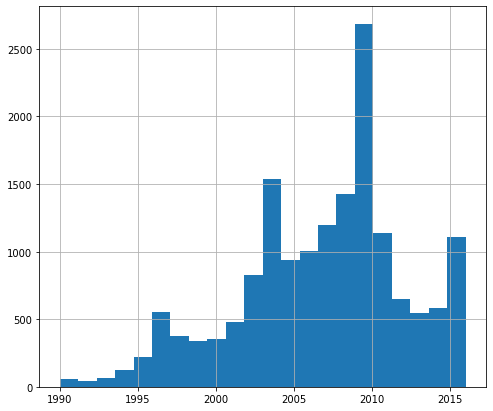

In [172]:
df.year_of_release.hist(bins = 22, figsize = (8,7), range = (1990, 2016))                                                                     #постройка гистограммы

Из гистограммы видно что активный рост происходит с начала 1995 года и по 2008 год. Но для построения прогнозов на 2017 год такой период не подходит поэтому лучше ориентироваться на ближайшие года с 2012 - 2016г.

**Посмотрите, как менялись продажи по платформам. Выберите платформы с
наибольшими суммарными продажами и постройте распределение по годам.
За какой характерный срок появляются новые и исчезают старые платформы?**

Найдём платформы с наибольшими продажами.

In [173]:
df.groupby("platform")["global_sales"].sum().sort_values(ascending = False)                                             #сортировка платформ по продажам


platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: global_sales, dtype: float64

Возьмём первые 4 и постром столбиковую диаграмму.

In [174]:
platforms = (df.groupby("platform")["global_sales"].sum().
               sort_values(ascending = False).head(4).index.values)                                    #спиcок из платформ

In [175]:
platforms_df = df.pivot_table(index = "year_of_release", columns = "platform",values = "global_sales", aggfunc = sum)       #построение сводной таблицы

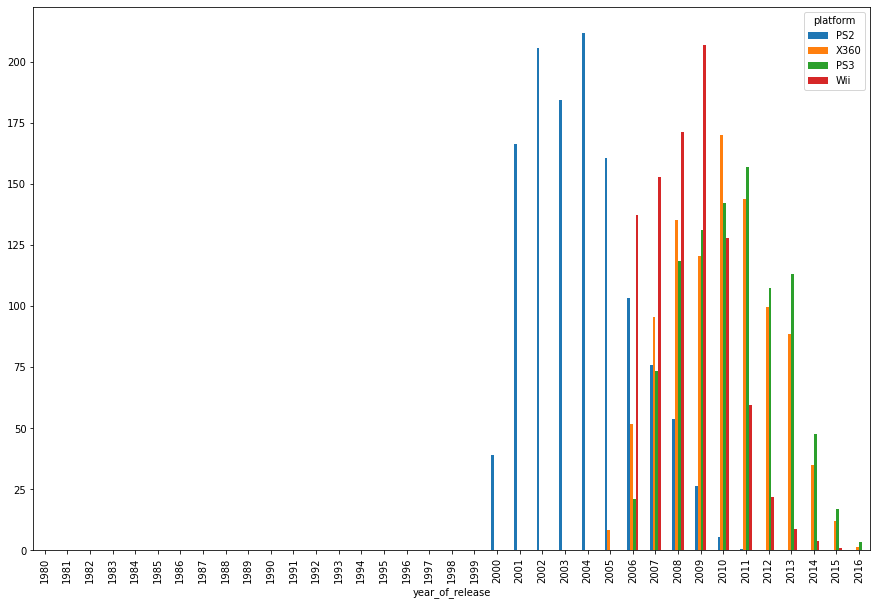

In [176]:
platforms_df.plot(y = platforms, kind = "bar", figsize = (15,10))                                                  #вывод столбиковой диаграммы

Для 4 платформ можно заметить одинаковые особенности.

Из диаграмм видно что скорость появления таких платформ примерно год.
Время существования(популярности) от 3-5 лет,  а потом в течении 3-4 лет использование платформы прекращается.

**Возьмите данные за соответствующий актуальный период. Актуальный
период определите самостоятельно в результате исследования предыдущих
вопросов. Основной фактор — эти данные помогут построить прогноз на 2017
год.**

Для построения прогноза на 2017 год необходимы данные примерно за 4 прошедших года. По таким данным можно определить набирающую популярность платформу и примерный срок ее существования.

Сохраним в переменную данные с 2012 года.
Выведем таблицу на экран.

In [177]:
topical_df = df.query('year_of_release >= 2011')                                                                             #срез по году
topical_df                                                                                                                   #вывод таблицы

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,Unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,Unknown,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,Unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,Unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,Unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,Unknown,0.01


**Какие платформы лидируют по продажам, растут или падают? Выберите
несколько потенциально прибыльных платформ.**

Выведем  список платформ лидирующие по продажам с 2012 года.

In [178]:
topical_platforms = (topical_df.groupby("platform")["global_sales"].sum().
                               sort_values(ascending = False).head(7).index.values)                    #список из платформ
topical_platforms                                                                                                                               #вывод списка на экран

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'PC', 'Wii'], dtype=object)

Построим диаграмму с платформами из этого списка по годам.

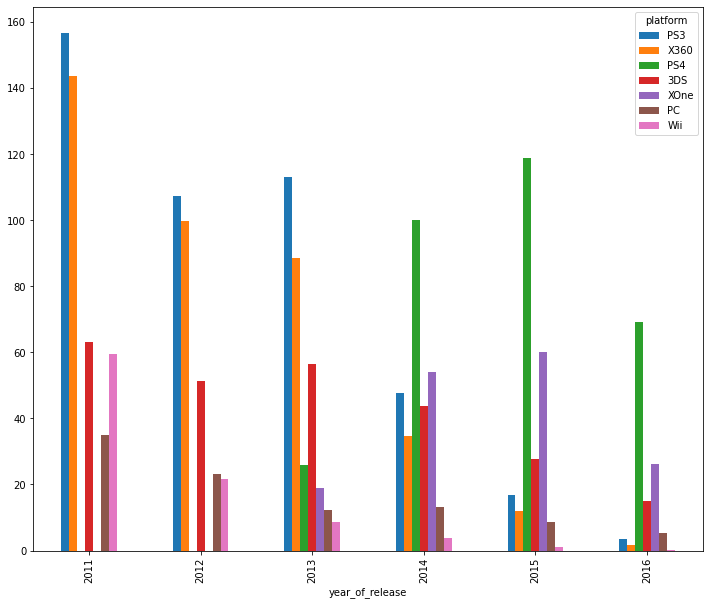

In [179]:
(topical_df.pivot_table(index = "year_of_release", columns = "platform",values = "global_sales", aggfunc = sum).
           plot(y = topical_platforms, kind = "bar",figsize = (12,10)))

Диаграмма показывает общий спад на всех платформах,вероятно это сказано тем что год еще не закончен и данные не полные. Тем не менее можно заметить что c момента выпуска 'ps4' и 'XOne' прошло 3 года что говорит о потанцеале платформ.

Также можно заметить довольно стабильные показатели на '3DS','PC' и 'WiiU'.
Показатели платформ 'ps3' и 'X360'  достигли минимума.

**Постройте график «ящик с усами» по глобальным продажам игр в разбивке по
платформам. Опишите результат.**

Построим 'boxplot' по глобальным продажам в разбивке по платформам из 'актуальной таблицы'.

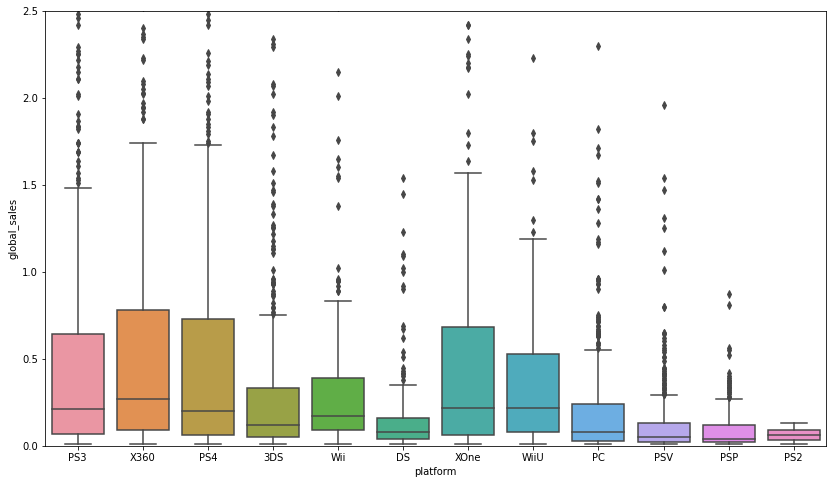

In [180]:
plt.figure(figsize = (14,8))                                                    #диаграмма размаха
plt.ylim(0,2.5)
sns.boxplot(x="platform", y="global_sales", data=topical_df)


Из диаграммы видно что самыми популярной были платформы 'X360', 'ps4',"XOne",'WiiU' и 'ps3'. Остальные платформы не имеют таких высоких продаж.

**Посмотрите, как влияют на продажи внутри одной популярной платформы
отзывы пользователей и критиков. Постройте диаграмму рассеяния и
посчитайте корреляцию между отзывами и продажами. Сформулируйте
выводы.**

Выберем платформу 'PS4' для постройки диаграмм рассеяния.

Посмотрим на взаимосвязь между отзывами критиков и глобальными продажами.

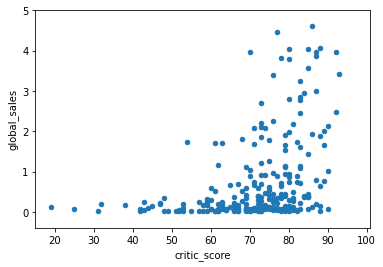

In [181]:
(topical_df.query('critic_score != -1 and platform  == "PS4"').
           plot(y = "global_sales", x = "critic_score", kind = "scatter", ylim = (-0.4,5)))            #диаграмма рассеяния

Проверим зависимость.

In [182]:
(topical_df.query('critic_score != -1 and platform  == "PS4"')["critic_score"].
           corr(topical_df.query('critic_score != -1 and platform  == "PS4"')["global_sales"]))           #оценка зависимости

0.40656790206178095

Посмотрим на взаимосвязь между отзывами пользователей и глобальными продажами.

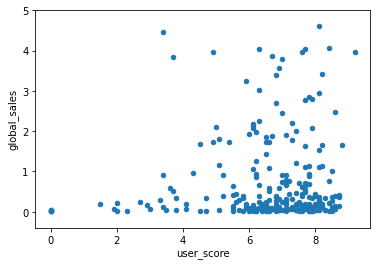

In [183]:
(topical_df.query('user_score != -1 and platform  == "PS4"').
           plot(y = "global_sales", x = "user_score", kind = "scatter", ylim = (-0.4,5)))          #диаграмма рассеяния

In [184]:
(topical_df.query('user_score != -1 and platform  == "PS4"')["user_score"].
           corr(topical_df.query('user_score != -1 and platform  == "PS4"')["global_sales"]))       #оценка зависимости

0.023279300963610326

Из построенных диаграмм для платформы 'PS4' можно увидеть большую зависимость  между отзывами критиков и глобальными продажами. Диаграмма показывает небольшую нелинейную положительную зависимость.

Для отзывов пользователей и глобальными ценами зависимости нет что показывает более рассеенные значения на диаграмме. 
Количество продаж не сильно зависит от голосов пользователей.

**Соотнесите выводы с продажами игр на других платформах.**

Построим диаграммы рассеяния для всех платформ и сравним зависимости.

Построим диаграмму зависимости между оценками критиков и продажами.

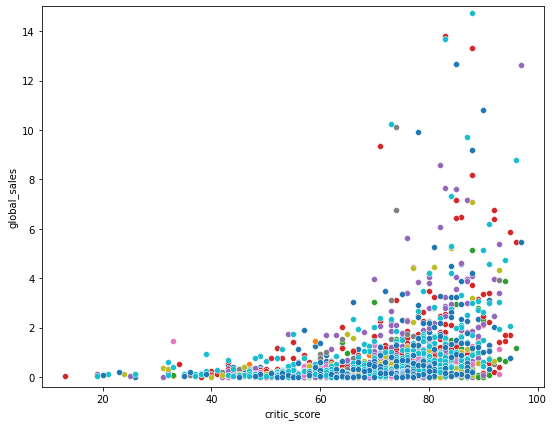

In [185]:
plt.figure(figsize = (9,7))
plt.ylim(-0.4,15)
for name, group_df in topical_df.groupby("platform"):
  sns.scatterplot(data = group_df.query('platform == @name and critic_score != -1'), x = "critic_score", y = "global_sales")  #диаграмма рассеяния

Построим диаграмму зависимостей между оценками пользователей и  продажами.

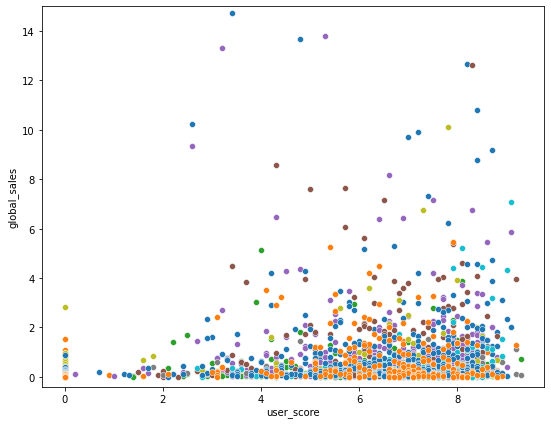

In [186]:
plt.figure(figsize = (9,7))
plt.ylim(-0.4,15)
for name, group_df in topical_df.groupby("platform"):
  sns.scatterplot(data = group_df.query('platform == @name and user_score != -1'), x = "user_score", y = "global_sales")   #диаграмма рассеяния 

Как и для отдельной платформы можно наблюдать нелинейную положительную зависимость между диаграмм между оценками критиков и глобальными продажами.

Для диаграмм между оценками пользователей и продажами наблюдается всё такое же отсутствие зависимости и более рассеенные показатели. 

Исходя из построенных диаграмм можно предположить что продажи чуствительны к отзывам критиков поторые превышают 60 баллов.

**Посмотрите на общее распределение игр по жанрам. Что можно сказать о
самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими
продажами?**

Посчитаем выпущенные игры по жанрам.

In [187]:
topical_df.pivot_table(index = "genre", values = "global_sales", aggfunc = ["count","sum"])                #сводная таблица

,count,sum
,global_sales,global_sales
genre,,
Action,1269,557.80
Adventure,410,45.04
Fighting,159,66.90
Misc,375,139.42
Platform,122,88.68
Puzzle,71,9.85
Racing,180,88.31
Role-Playing,465,245.63


Из полученной таблицы выделяем 'Action' как самый популярный по выпуску жанр. Далее идут 'Role_Playing', 'Adventure', 'Sport', 'Misc', 'Shooter'.
Самый не популярный жанр 'Puzzle'. Общий доход по жанрам также показывает лидеров экшн и шутер.

Теперь проверим каждый жанр на продажи.

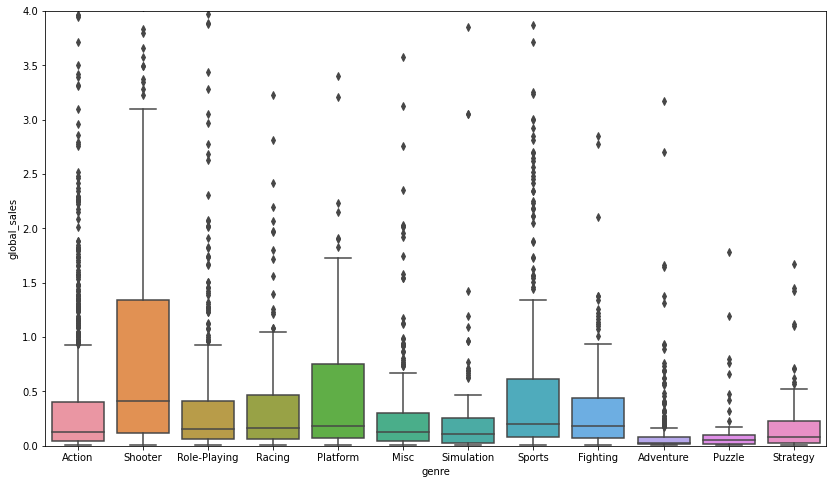

In [188]:
plt.figure(figsize = (14,8))
plt.ylim(0,4)
sns.boxplot(x="genre", y="global_sales", data=topical_df)                           

Из диаграммы видно что  жанр 'Shooter' более покупаем чем остальные. Затем идут 'Platform' и 'Sport'. Самые плохопродаваемые 'Adventure' и 'Puzzle'.

**Вывод**

При анализе данных мы определили актуальный период для прогнозирования.Рассмотрели платформы которые становились популярны за этот период, посмотрели на продажи по ним, оценили влияние отзывов на продажи и определили популярные жанры игр.

Актуальный периуд был взят с 2012 года потому что на гстограмме видно что значительные изменения в количествевыпуска игр начинаются как раз с этого года. И для прогнозирования нам вполне хватит 4 лет.

За взятый период видно что набирают популярность платформы PS4 и XBox One. У этих платформ есть потанцеал к росут, т.к. они появились только в 2013 году. А как мы выяснили на примере Х360 и PS3 что платформы живут примерно 6-8 лет.
Также есть платформы которые не сильно подвержены устареванию, к ним можно отнести PC.

Диаграммы рассеяния показывают большую зависимость от отзывов критиков на продажи игр. Пользователи склонны доверять экспертам.

Игры вышедшие за этот период в основном продавались на платформах PS3, PS4, X360, XOne.

Самыми прибыльными жанрами являются Экшн и Шутер, но если рассматривать жанры в которых одна выпущенная игра в основном имеет большее количество продаж то это Шутеры, платформеры и спортивные игры. 

**СОСТАВЬТЕ ПОРТРЕТ ПОЛЬЗОВАТЕЛЯ КАЖДОГО РЕГИОНА**

**Самые популярные платформы (топ-5). Опишите различия в долях продаж.**

Определим для каждого региона топ-5 платформ по убыванию.

In [189]:
 na_top_platform = topical_df.groupby("platform")["na_sales"].sum().sort_values(ascending = False).head(5).index.values       #определение топ-5 по регионам
 eu_top_platform = topical_df.groupby("platform")["eu_sales"].sum().sort_values(ascending = False).head(5).index.values
 jp_top_platform = topical_df.groupby("platform")["jp_sales"].sum().sort_values(ascending = False).head(5).index.values

In [190]:
print( "Популярные платформы в Северной америке: ", na_top_platform)                              #вывод топ платформ
print( "Популярные платформы в Европе: ", eu_top_platform)
print( "Популярные платформы в Японии: ", jp_top_platform)

Популярные платформы в Северной америке:  ['X360' 'PS3' 'PS4' 'XOne' '3DS']
Популярные платформы в Европе:  ['PS3' 'PS4' 'X360' '3DS' 'PC']
Популярные платформы в Японии:  ['3DS' 'PS3' 'PSP' 'PSV' 'PS4']


Результаты для каждого региона разные, но видно что ps3 попало в первую тройку во всех регионах.

Построим круговые диаграммы для каждого региона чтобы посмотреть как распределены продажи по платформам.

Построим круговую диаграмму для Северной Америке.

([<matplotlib.patches.Wedge at 0x7f3ec0fa4550>,
 [Text(0.5487811653512698, 0.953330599821333, 'X360'),
  Text(-1.0610848245599183, 0.28999826738904483, 'PS3'),
  Text(-0.5815416964835672, -0.9337072642166894, 'PS4'),
  Text(0.4040696052614142, -1.0230971381564338, 'XOne'),
  Text(1.0206786570352095, -0.41014031632211106, '3DS')],
 [Text(0.2993351811006925, 0.5199985089934543, '33.4'),
  Text(-0.5787735406690462, 0.15818087312129717, '24.8'),
  Text(-0.3172045617183094, -0.5092948713909214, '16.0'),
  Text(0.22040160286986227, -0.5580529844489638, '13.7'),
  Text(0.556733812928296, -0.22371289981206055, '12.2')])

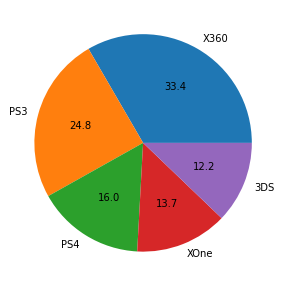

In [191]:
plt.figure(figsize = [5,5])                                                                     #постройка диаграммы
plt.pie(topical_df.groupby("platform")["na_sales"].sum().sort_values(ascending = False).head(5), 
        labels = na_top_platform,
        autopct = "%.1f")

Наблюдаем что половина продаж из топ-5 по Америке приходится на X360 и PS3.

Построим диаграмму для Европы.

([<matplotlib.patches.Wedge at 0x7f3ec0efffd0>,
 [Text(0.6396907998494167, 0.894871879426331, 'PS3'),
  Text(-1.0047209819415084, 0.4478121798773356, 'PS4'),
  Text(-0.5137296555099509, -0.9726673845923011, 'X360'),
  Text(0.5779661045178389, -0.9359247737016446, '3DS'),
  Text(1.0405325208677005, -0.35678014661232, 'PC')],
 [Text(0.34892225446331815, 0.4881119342325441, '30.2'),
  Text(-0.54802962651355, 0.24426118902400124, '26.2'),
  Text(-0.28021617573270047, -0.5305458461412551, '21.7'),
  Text(0.3152542388279121, -0.5105044220190789, '11.4'),
  Text(0.5675631932005638, -0.19460735269762905, '10.5')])

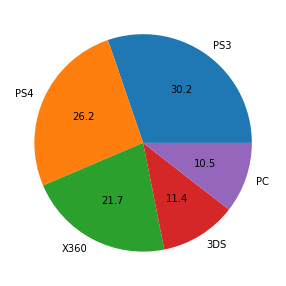

In [192]:
plt.figure(figsize = [5,5])                                                                       #постройка диаграммы
plt.pie(topical_df.groupby("platform")["eu_sales"].sum().sort_values(ascending = False).head(5), 
        labels = eu_top_platform,
        autopct = "%.1f")

В Европе половина продаж приходится на PS3 и PS4.

Построим диаграмму для Японии.

([<matplotlib.patches.Wedge at 0x7f3ec0ee1b10>,
 [Text(0.08644743110236115, 1.0965978486463497, '3DS'),
  Text(-0.9230631249327274, -0.5982929611732271, 'PS3'),
  Text(0.10237367768838623, -1.095225835212334, 'PSP'),
  Text(0.7685640995310823, -0.7869620225347452, 'PSV'),
  Text(1.0693348435678485, -0.2579205155309, 'PS4')],
 [Text(0.04715314423765154, 0.5981442810798271, '47.5'),
  Text(-0.503488977236033, -0.3263416151853965, '23.3'),
  Text(0.05584018783002885, -0.5973959101158185, '11.3'),
  Text(0.4192167815624085, -0.42925201229167914, '10.3'),
  Text(0.5832735510370082, -0.14068391756230908, '7.5')])

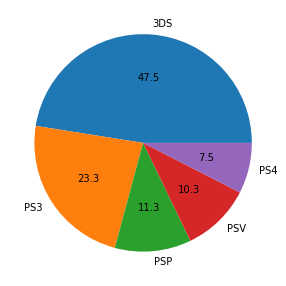

In [193]:
plt.figure(figsize = [5,5])                                                                     #постройка диаграммы
plt.pie(topical_df.groupby("platform")["jp_sales"].sum().sort_values(ascending = False).head(5), 
        labels = jp_top_platform,
        autopct = "%.1f")

В янония одна платформа 3DS занимает почти половину продаж. На 20% отстаёт PS3.

Из диаграмм видно что продажи игр на PS3 имеют 20% от топ-5 в кажом регионе. В Японском регионе помимо того что игры на одну платформу занимают почти половину от всех продаж из топ-5, так еще в отличии от других регионов в этот сиписок не попала X360. Это говорит о различии вкусов, доступности или популярности платформ в Японии.

**Самые популярные жанры (топ-5). Поясните разницу.**

Определим топ-5 жанров в каждом регионе.

In [194]:
na_top_genre = topical_df.groupby("genre")["na_sales"].sum().sort_values(ascending = False).head(5).index.values       #группировка топ-5 по жанрам
eu_top_genre = topical_df.groupby("genre")["eu_sales"].sum().sort_values(ascending = False).head(5).index.values
jp_top_genre = topical_df.groupby("genre")["jp_sales"].sum().sort_values(ascending = False).head(5).index.values

Выведем на экран результаты.

In [195]:
print( "Популярные жанры в Северной америке: ", na_top_genre)                              #вывод топ жанрам
print( "Популярные жанры в Европе: ", eu_top_genre)
print( "Популярные жанры в Японии: ", jp_top_genre)

Популярные жанры в Северной америке:  ['Action' 'Shooter' 'Sports' 'Role-Playing' 'Misc']
Популярные жанры в Европе:  ['Action' 'Shooter' 'Sports' 'Role-Playing' 'Racing']
Популярные жанры в Японии:  ['Role-Playing' 'Action' 'Misc' 'Fighting' 'Platform']


Видим что в Европы и Америки примерно одинаковые вкусы по жанрам.
Япония наоборот не играет в шутеры, зато на первом месте стоят ролевые игры.

Посмотрим соотношениее жанров в каждом регионе.

Построим круговую диаграмму с процентами для Америки.

([<matplotlib.patches.Wedge at 0x7f3ec0e43b90>,
 [Text(0.5423793174690493, 0.9569872914421635, 'Action'),
  Text(-1.0888042522830057, 0.1565416884106117, 'Shooter'),
  Text(-0.3548363526702035, -1.041196985600567, 'Sports'),
  Text(0.5759652566110379, -0.9371574164338569, 'Role-Playing'),
  Text(1.0446957030066149, -0.344399314923121, 'Misc')],
 [Text(0.29584326407402683, 0.5219930680593619, '33.6'),
  Text(-0.5938932285180031, 0.08538637549669728, '28.3'),
  Text(-0.19354710145647464, -0.5679256285094001, '15.8'),
  Text(0.3141628672423843, -0.5111767726002855, '12.2'),
  Text(0.5698340198217898, -0.18785417177624777, '10.1')])

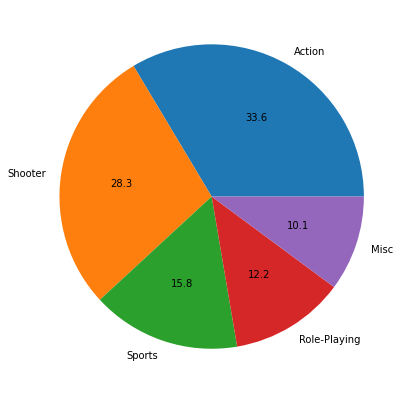

In [196]:
plt.figure(figsize = [7,7])                                                                          #постройка диаграммы
plt.pie(topical_df.groupby("genre")["na_sales"].sum().sort_values(ascending = False).head(5),
        labels = na_top_genre,
        autopct = "%.1f")

В Америке предпоситают Экшн игры и Шутеры, больше половины топ-5.

Построим диаграмму для Европы.

([<matplotlib.patches.Wedge at 0x7f3ec0e285d0>,
 [Text(0.43759875706060086, 1.009211240434339, 'Action'),
  Text(-1.098872956408656, -0.04978178053967887, 'Shooter'),
  Text(-0.15980243737391195, -1.088330455794267, 'Sports'),
  Text(0.7367111245624395, -0.8168578327628045, 'Role-Playing'),
  Text(1.0693178650237627, -0.2579908981747659, 'Racing')],
 [Text(0.2386902311239641, 0.5504788584187303, '37.0'),
  Text(-0.5993852489501759, -0.02715369847618847, '27.5'),
  Text(-0.08716496584031559, -0.5936347940696002, '16.4'),
  Text(0.4018424315795124, -0.4455588178706206, '11.6'),
  Text(0.5832642900129613, -0.14072230809532682, '7.5')])

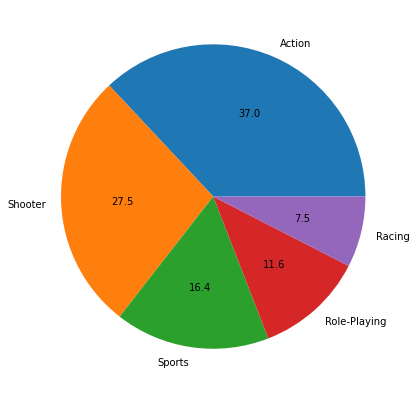

In [197]:
plt.figure(figsize = [7,7])                                                                           #постройка диаграммы
plt.pie(topical_df.groupby("genre")["eu_sales"].sum().sort_values(ascending = False).head(5),
        labels = eu_top_genre,
        autopct = "%.1f")

Европейцы также предпочитают Экшн и Шутеры. Также больше половины топ-5.

Построи диаграмму для Японии.

([<matplotlib.patches.Wedge at 0x7f3ec25ec550>,
 [Text(0.23883090335058557, 1.073759656349941, 'Role-Playing'),
  Text(-0.8828625420139479, -0.6561659332125299, 'Action'),
  Text(0.4716561841860773, -0.9937506950533567, 'Misc'),
  Text(0.8951421078844835, -0.6393126048281264, 'Fighting'),
  Text(1.0768950855683714, -0.22426987019813863, 'Platform')],
 [Text(0.13027140182759211, 0.5856870852817859, '43.0'),
  Text(-0.4815613865530624, -0.3579086908431981, '34.3'),
  Text(0.25726700955604215, -0.5420458336654672, '9.5'),
  Text(0.48825933157335455, -0.3487159662698871, '6.7'),
  Text(0.5873973194009299, -0.12232902010807559, '6.5')])

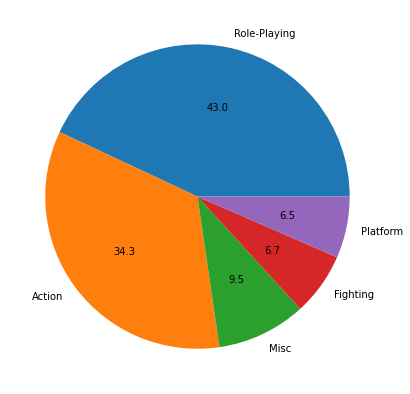

In [198]:
plt.figure(figsize = [7,7])                                                                          #постройка диаграммы
plt.pie(topical_df.groupby("genre")["jp_sales"].sum().sort_values(ascending = False).head(5),
        labels = jp_top_genre,
        autopct = "%.1f")

В Японии, в отличии от остальных регионов, идет преобладание 2 жанров, Ролевые игры и Экшн они занимают приблизительно по 1/3 из топ-5.

Опять же видим что Японские вкусы отличаются от населения Европы и Америки.
Идет преобладание Ролевых и Экшн игр, Шутеры даже не попали в топ-5.
Американцы и Европейцы наоборот имеют похожие вкусы в играх об этом говорит почти одинаковая процентовка на диаграммах. Заметное отличие среди этид 2 регионов, то что в Европе вместо Misс игр играют в гонки.

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

Посчитаем рейтинг продаж игр по убыванию для всех регионов. Заранее исключим из выборки игры без рейтинга.

In [199]:
na_rating = topical_df.query('rating != "Unknown"').groupby("rating")["na_sales"].sum().sort_values(ascending = False).index.values       #группировка по рейтингу 
eu_rating = topical_df.query('rating != "Unknown"').groupby("rating")["eu_sales"].sum().sort_values(ascending = False).index.values
jp_rating = topical_df.query('rating != "Unknown"').groupby("rating")["jp_sales"].sum().sort_values(ascending = False).index.values

Выведем получившиеся результаты на экран.

In [200]:
print( "Рейтинг продаж игр в Северной америке: ", na_rating)                              #вывод рейтинга
print( "Рейтинг продаж игр в Европе: ", eu_rating)
print( "Рейтинг продаж игр в Японии: ", jp_rating)

Рейтинг продаж игр в Северной америке:  ['M' 'E' 'E10+' 'T' 'EC' 'RP']
Рейтинг продаж игр в Европе:  ['M' 'E' 'T' 'E10+' 'RP' 'EC']
Рейтинг продаж игр в Японии:  ['E' 'T' 'M' 'E10+' 'EC' 'RP']


Для наглядности построим кругивую диаграмму и посмотрим соотношения продаж игр по рейтингу.

Построим диаграмму для Северной Америки.

([<matplotlib.patches.Wedge at 0x7f3ec1ad9dd0>,
 [Text(0.2167858905678939, 1.0784265749927926, 'M'),
  Text(-1.0293305316860926, -0.38791578536948745, 'E'),
  Text(0.07753602508621577, -1.09726394491655, 'E10+'),
  Text(0.9705135326656728, -0.5177871019181498, 'T'),
  Text(1.0999980804601828, -0.002054990003286939, 'EC'),
  Text(1.099999999999817, 6.348332998810039e-07, 'RP')],
 [Text(0.11824684940066939, 0.5882326772687959, '43.7'),
  Text(-0.5614530172833232, -0.21159042838335676, '24.1'),
  Text(0.04229237731975405, -0.5985076063181182, '16.7'),
  Text(0.5293710178176396, -0.28242932831899076, '15.5'),
  Text(0.5999989529782814, -0.001120903638156512, '0.1'),
  Text(0.5999999999999001, 3.462727090260021e-07, '0.0')])

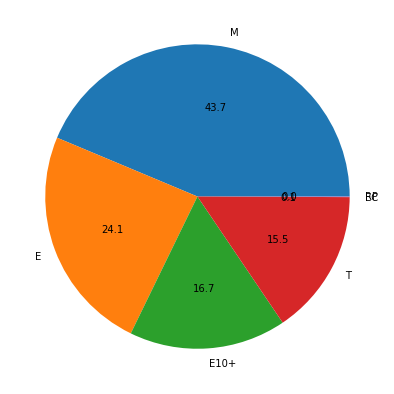

In [201]:
plt.figure(figsize = [7,7])                                                             #постройка диаграммы
plt.pie(topical_df.query('rating != "Unknown"').groupby("rating")["na_sales"].sum().sort_values(ascending = False),
        labels  = na_rating,
        autopct = "%.1f")

Построим диаграмму для Европы.

([<matplotlib.patches.Wedge at 0x7f3ec19c0090>,
 [Text(0.163873158551621, 1.0877249596779122, 'M'),
  Text(-0.9622437481010991, -0.5329980949687801, 'E'),
  Text(0.2317036685968034, -1.0753201430080173, 'T'),
  Text(0.9936681012978107, -0.4718301648508751, 'E10+'),
  Text(1.0999999839019694, -0.0001881905076865869, 'RP'),
  Text(1.0999999999997245, -7.785558586299762e-07, 'EC')],
 [Text(0.08938535920997508, 0.5933045234606793, '45.2'),
  Text(-0.524860226236963, -0.2907262336193346, '25.6'),
  Text(0.12638381923462003, -0.5865382598225548, '15.0'),
  Text(0.5420007825260785, -0.25736190810047727, '14.1'),
  Text(0.599999991219256, -0.00010264936782904738, '0.0'),
  Text(0.5999999999998497, -4.24666831979987e-07, '0.0')])

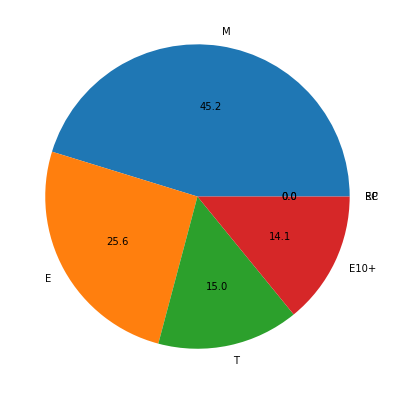

In [202]:
plt.figure(figsize = [7,7])                                                                 #постройка диаграммы
plt.pie(topical_df.query('rating != "Unknown"').groupby("rating")["eu_sales"].sum().sort_values(ascending = False),
        labels  = eu_rating,
        autopct = "%.1f")

Построим диаграмму для Японии.

([<matplotlib.patches.Wedge at 0x7f3ec1185810>,
 [Text(0.5256847717251285, 0.9662585165349384, 'E'),
  Text(-1.0997761184605963, 0.022192099128843085, 'T'),
  Text(0.164067416043454, -1.087695675725901, 'M'),
  Text(1.0412260681185284, -0.3547510043261752, 'E10+'),
  Text(1.0999999999999568, -3.0896829841550223e-07, 'EC'),
  Text(1.0999999999999568, -3.0896829841550223e-07, 'RP')],
 [Text(0.2867371482137064, 0.5270500999281482, '34.1'),
  Text(-0.5998778827966889, 0.012104781343005317, '31.1'),
  Text(0.08949131784188401, -0.593288550395946, '24.3'),
  Text(0.5679414917010154, -0.19350054781427733, '10.5'),
  Text(0.5999999999999763, -1.685281627720921e-07, '0.0'),
  Text(0.5999999999999763, -1.685281627720921e-07, '0.0')])

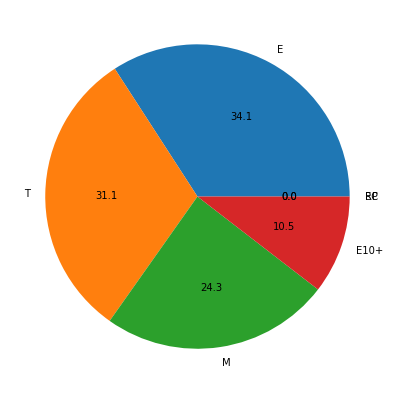

In [203]:
plt.figure(figsize = [7,7])                                                                           #постройка диаграммы
plt.pie(topical_df.query('rating != "Unknown"').groupby("rating")["jp_sales"].sum().sort_values(ascending = False),
        labels  = jp_rating,
        autopct = "%.1f")

Из диаграмм видно что распределение игра по рейтингу в Европейский и Северной Америке очень похоже, разница всего в нескольких процентах.

Рейтинг игр в японии напротив сильно отличается от остальных регионов. Здесь на первом месте по распределению стоият игры с рейтингом для всех("E") потом идут игры для подростков ("T"), а потом для взрослых ("M").

Логично предположить что такое распределение говорит о том что в Японии большенство игр покупают подростки, а затем только взрослые. В Европе и Америке наоборот.

**Выводы**

Исходя из рассмотренных распределений по жанрам, платформам, и рейтингу, построим промерныей портрет пользователя по каждому региону.
Сразу можно выделить что в японском регионе пользователи имеют заметные отличия по всем 3 критериям оценки.

Американский пользователь играет больше в Экшн или Шутер на платформе X360 и PS3 и ему в большенстве случаев от 17 лет.
Европейский пользователь также предпочитает Экше или Шутер, играет на платформах PS3, PS4 и ему тоже от 17 лет.
Японский пользователь это подросток от 13 лет, играть он любит в Ролевые игры и Экшн игры и предпочитает платформу 3DS и PS3.

**ПРОВЕРКА ГИПОТЕЗ**

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**
Сформируем гипотезы.

Нулевая гипотеза: средние рейтинги по платформам одинаковые.

Альтернативная гипотеза: средние рейтинги по платформам разные.

Сохраним в переменных список из значений рейтинга по каждой платформе и исключим из списка "заглушку".

In [204]:
xbx_user_score = topical_df.query('user_score != -1 and platform == "XOne"')["user_score"].values                #создание списков
pc_user_score = topical_df.query('user_score != -1 and platform == "PC"')["user_score"].values

Применим метод st.ttest_ind() для проверки гипотезы.

In [205]:
result = st.ttest_ind(xbx_user_score,pc_user_score)                                                            #подсчёт значимости

Выставим уровень альфа для определения статитической значимости в 5%.

In [206]:
alpha = .05                                                                                                  #уровень значимости

Сравним показатели и выведем результат.

In [207]:
print("P_value ",result.pvalue)                                                                              #вывод pvalue
if(result.pvalue < alpha):                                                                                   #вывод результата
    print("P-value меньше alpha. Разница статистически значимая. Отвергаем нулевую гипотезу.")
else:
  print("Разница статистически незначима. Отвернуть нулевую гипотезу не получилось.")

P_value  0.7728168689375713
Разница статистически незначима. Отвернуть нулевую гипотезу не получилось.


Из результата следует что значение P-value 0.77. Это означает что при сравнении средних 2 выборок с вероятностью 77% такое различие могло получиться случайно. Следовательно это слишком большая вероятность что-бы делать вывод о значимом различии между средними выборок.

**Средние пользовательские рейтинги жанров Action и Sports разные**

Построим гипотезы.

Нулевая гипотеза: рейтинги равны.

Алтернативная гипотеза: рейтинги разные.

Создадим переменные с рейтингама по жанрам.

In [208]:
action_user_score = topical_df.query('user_score != -1 and genre == "Action"')["user_score"].values               #создание переменной
sports_user_score = topical_df.query('user_score != -1 and genre == "Sports"')["user_score"].values

Методом st.ttest_ind() подсчитаем вероятност.  Установим уровень значимости на 5%.

In [209]:
result = st.ttest_ind(action_user_score,sports_user_score)                                             #подсчёт значимости

alpha = .05                                                                                            #урвень значимости

Выведем результат на экран.

In [210]:
print(result.pvalue)                                                                                   #вывод p-value
if(result.pvalue > alpha):                                                                             #вывод результата
  print("P-value больше alpha. Альтернативную гипотезу не удалость подтвердить. Результат статистически не значим.")
else:
  print("P-value меньше alpha. Результат статистически значим. Отвергаем нулевую гипотезу.")

3.333976937939034e-14
P-value меньше alpha. Результат статистически значим. Отвергаем нулевую гипотезу.


Значение p-value показывает крайне мальнекую вероятность случайного различия средних этих выборок. Поэтому нулевую гипотезу отвергаем. На этом основании можно сказать что средние пользовательские рейтинги действительно разные. НО подтвирждением данной гипотезы мы не можем сказать больше или меньше.

**ОБЩИЕ ВЫВОДЫ**

В ходе работы с датафрейма был определён актуальный периоод для постройки прогнозов и планирования рекламных компаний. Этот период составляет 4 года с 2012 по 2016г. За этот срок было определено что идет обновление популярных платформ. Если в предыдущие года такими платформами были PS3 и X360, то сейчас нибрали популярность PS4 и XOne. Также нельзя исключать популярную в Японии платформу 3DS и стабильную для всех регионов PC.

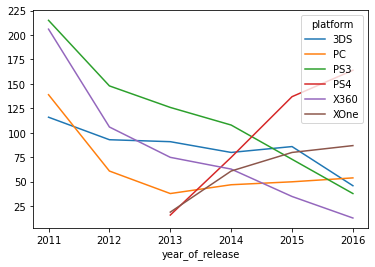

In [211]:
topical_df.query('platform == ["XOne","X360","PS3","PS4","PC","3DS"]').pivot_table(index = "platform", columns = "year_of_release", values = "global_sales",aggfunc = "count").T.plot(kind = "line")

Как видно из графика на больший выпуск игр приходится на ps4 и Xone. Остальные держатся на том же уровне или падают.

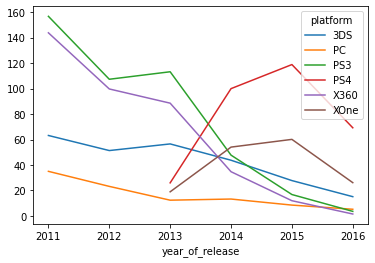

In [212]:
topical_df.query('platform == ["XOne","X360","PS3","PS4","PC","3DS"]').pivot_table(index = "platform", columns = "year_of_release", values = "global_sales",aggfunc = "sum").T.plot(kind = "line")

За последний год видно падение продаж, но это может быть обусловлено тем что статистика за весь год не полностью собрана. Но опять же на графике видно большое падение в продажах на PS3 и X360 это еще раз доказывает спад популярности платформ.

За последние годы как мы выяснили Экшн, Шутер, Ролвые игры и Спортивные являлись популярными жанрами. Посмотрим на их динамику на графике.

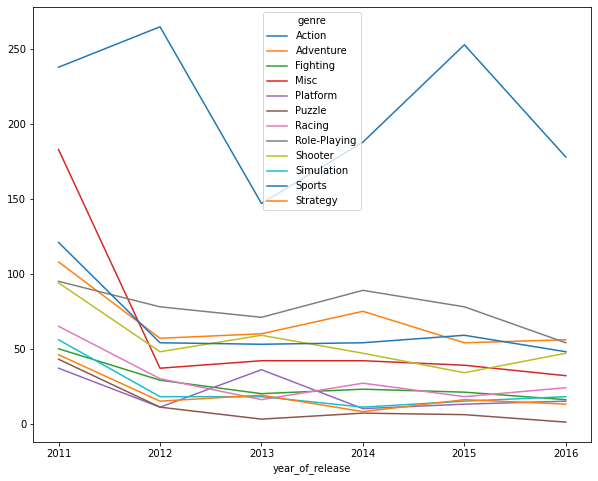

In [213]:
topical_df.pivot_table(index = "genre", columns = "year_of_release", values = "global_sales",aggfunc = "count").T.plot(kind = "line",figsize = [10,8])

Как видно они так и занимают лидирующие места по выпуску игр, причём жанр Экшн лидирует с большим отрывом. 

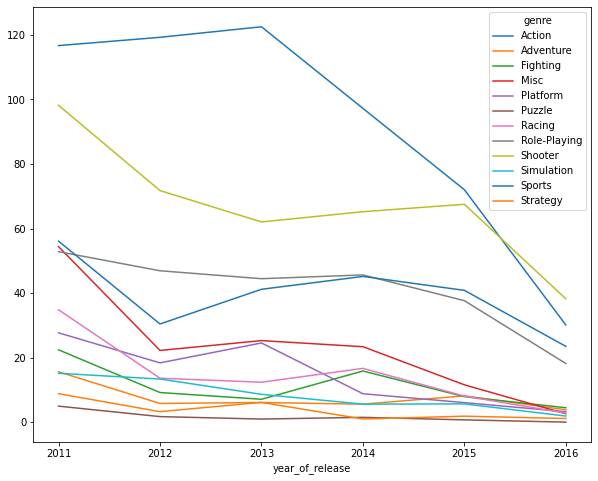

In [214]:
topical_df.pivot_table(index = "genre", columns = "year_of_release", values = "global_sales",aggfunc = "sum").T.plot(kind = "line",figsize = [10,8])

Также эти жанты являются самыми доходными.

Возрост пользователей для которых выпускают иры в Европе и Америке почти одинаков, а Японский регион характерен более молодой аудиторией. Это надо цчитывать для построения компаний для японского региона.

Так же, как мы выснили, более точную оценку продукта дают критики, нежели пользователи. Это необходимо учитывать при планировании рекламных компаний.